In [53]:
import numpy as np
import seaborn as sb
%config InlineBackend.figure_formats = ['svg']

def mean(x: list) -> float:
    return sum(x) / len(x)

def rms(x: list) -> float:
    mean_ = mean(x)
    length = len(x)
    x = map(lambda x: (x - mean_) ** 2, x)
    return np.sqrt(sum(x) / (length - 1))

def quantile(x: list, value: float) -> float:
    x = sorted(x)
    lenght = len(x)  
    left_elements = int(lenght * value)
    right_elements = int(lenght * (1 - value))
    print(lenght, left_elements, right_elements)
    if left_elements + right_elements == lenght:
        return (x[left_elements - 1] + x[left_elements]) / 2
    else:
        assert left_elements + right_elements == lenght - 1
        
        return x[left_elements]
def median(x: list) -> float:
    return quantile(x, 0.5)
spisok = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150]

In [31]:
#Задание №1
print(f'Среднее квадратичное отклонение: {rms(spisok)}')

Среднее квадратичное отклонение: 47.34795213553139


In [59]:
#Задание №2
q1 = quantile(spisok, 0.25)
q2 = quantile(spisok, 0.75)
iqd = q2 - q1
print(f'Первый квантиль: {q1} \nТретий квантиль: {q2} \nИнтерквартильное расстояние: {iqd}')

21 5 15
21 15 5
Первый квантиль: 45 
Третий квантиль: 84 
Интерквартильное расстояние: 39


<AxesSubplot:>

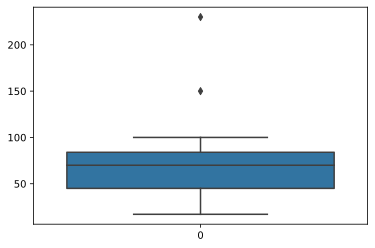

In [54]:
boxplot_range = (q1 - 1.5 * iqd, q2 + 1.5 * iqd)
outliers = list(filter(lambda x: not (boxplot_range[0] <= x <= boxplot_range[1]), spisok))
sb.boxplot(data=spisok)

In [70]:
#Задание №3
a = 100
b = 90
c = 45
p_a = a / (a + b + c)
p_b = b / (a + b + c)
p_c = c / (a + b + c)
print(f'Вероятность А: {p_a} \nВероятность В: {p_b} \nВероятность С: {p_c}')
p_sa = 0.5
p_sb = 0.6
p_sc = 0.7
p_s = p_sa * p_a + p_sb * p_b + p_sc * p_c
print(f'Полная вероятность: {p_s}')
p_as = p_sa * p_a / p_s
p_bs = p_sb * p_b / p_s
p_cs = p_sc * p_c / p_s
if p_as > p_bs and p_as > p_cs:
    print(f'Студент факультета: A (вероятность: {p_as})')
elif p_bs > p_as and p_bs > p_cs:
    print (f'Студент факультета:B (вероятность: {p_bs})')
else: 
    print (f'Студент факультета:C (вероятность: {p_cs})')

Вероятность А: 0.425531914893617 
Вероятность В: 0.3829787234042553 
Вероятность С: 0.19148936170212766
Полная вероятность: 0.5765957446808511
Студент факультета:B (вероятность: 0.3985239852398524)
